In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Seaborn_Batsman.csv")
df.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [4]:
missing_values = df.isnull()
print(missing_values)

     RunsScored  BallsFaced  BattingPosition  Dismissal  Inning  Opposition  \
0         False       False            False      False   False       False   
1         False       False            False      False   False       False   
2         False       False            False      False   False       False   
3         False       False            False      False   False       False   
4         False       False            False      False   False       False   
..          ...         ...              ...        ...     ...         ...   
203       False       False            False      False   False       False   
204       False       False            False      False   False       False   
205       False       False            False      False   False       False   
206       False       False            False      False   False       False   
207       False       False            False      False   False       False   

      Year  
0    False  
1    False  
2    False  

In [15]:
dismissal_counts = df['Dismissal'].value_counts()
dismissal_counts

Dismissal
Caught        121
NO             37
Bowled         21
LBW            12
Run out        12
Stumped         4
Hit wicket      1
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


In [6]:
df.isnull().sum()

RunsScored         0
BallsFaced         0
BattingPosition    0
Dismissal          0
Inning             0
Opposition         0
Year               0
dtype: int64

In [7]:
df.dtypes

RunsScored          int64
BallsFaced          int64
BattingPosition     int64
Dismissal          object
Inning              int64
Opposition         object
Year                int64
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,RunsScored,BallsFaced,BattingPosition,Inning,Year
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,49.192308,52.961538,3.264423,1.567308,2013.240385
std,43.797641,39.850548,0.781602,0.496644,2.750477
min,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,10.750000,18.000000,3.000000,1.000000,2011.000000
50%,35.000000,46.500000,3.000000,2.000000,2013.000000
75%,81.250000,83.250000,3.000000,2.000000,2015.000000
max,183.000000,159.000000,7.000000,2.000000,2018.000000


In [10]:
df.shape

(208, 7)

# PieChart

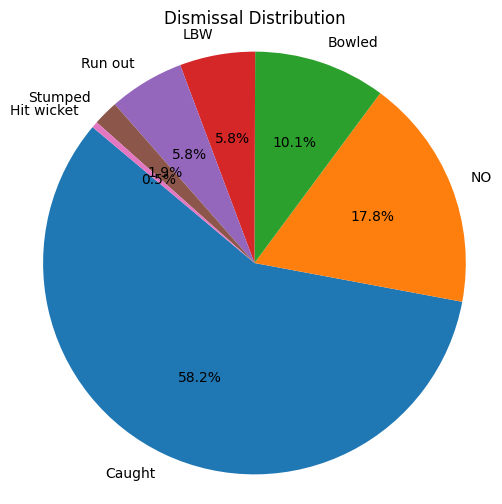

In [18]:
plt.figure(figsize=(6, 6))
plt.pie(dismissal_counts, labels=dismissal_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Dismissal Distribution')
plt.axis('equal') 
plt.show()

# BoxPlot

C:\Users\197as\AppData\Local\Temp\ipykernel_16932\2056620792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dismissal', y='RunsScored', data=df, palette='Set2')


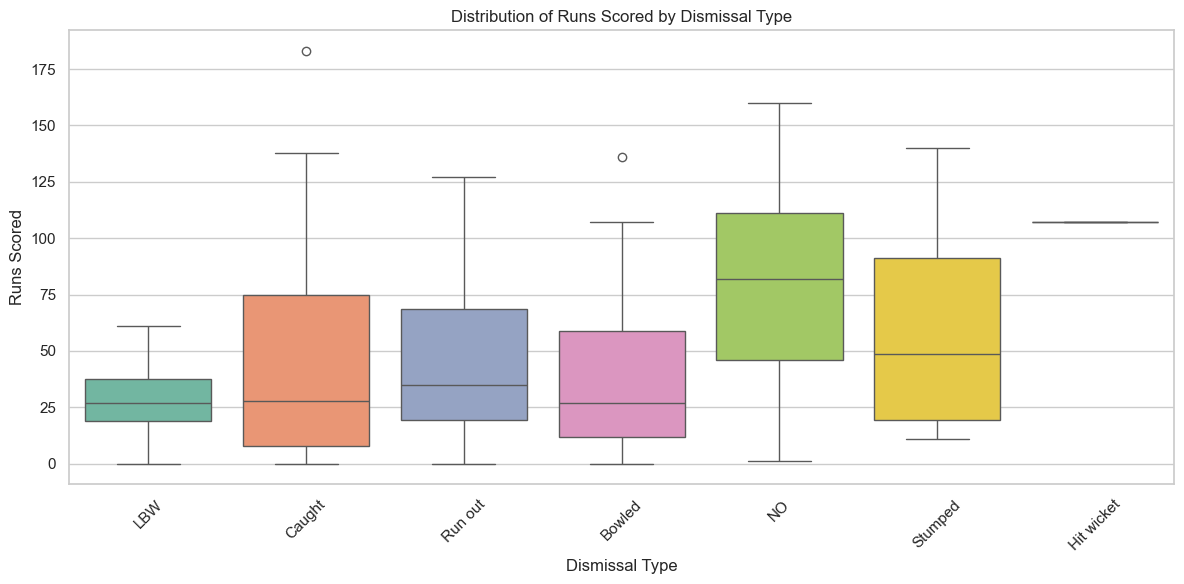

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dismissal', y='RunsScored', data=df, palette='Set2')

plt.title('Distribution of Runs Scored by Dismissal Type')
plt.xlabel('Dismissal Type')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatterplot

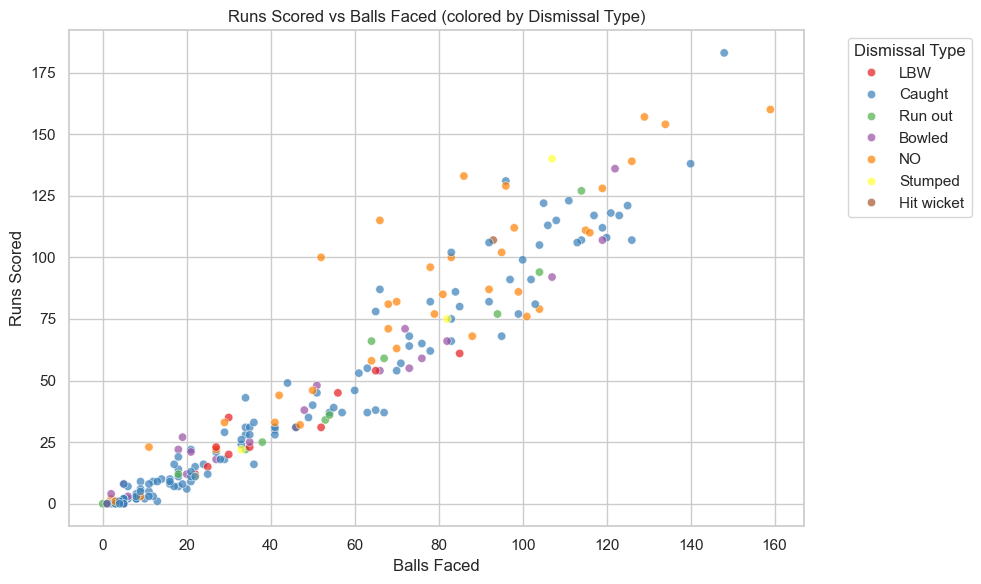

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BallsFaced', y='RunsScored', data=df, hue='Dismissal', palette='Set1', alpha=0.7)

plt.title('Runs Scored vs Balls Faced (colored by Dismissal Type)')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.legend(title='Dismissal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#  LinePlot

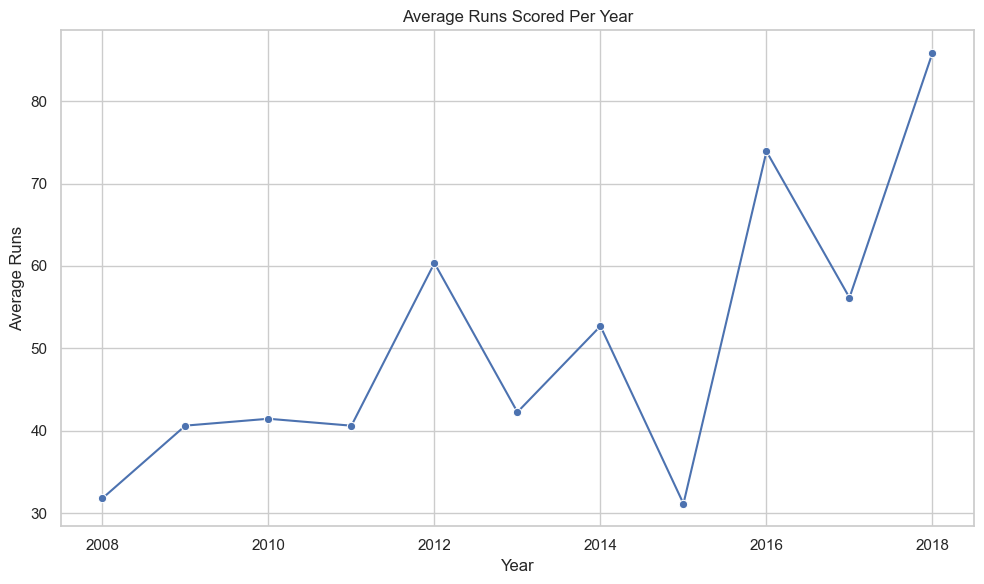

In [24]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
avg_runs_by_year = df.groupby('Year')['RunsScored'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_runs_by_year, x='Year', y='RunsScored', marker='o')
plt.title('Average Runs Scored Per Year')
plt.xlabel('Year')
plt.ylabel('Average Runs')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram


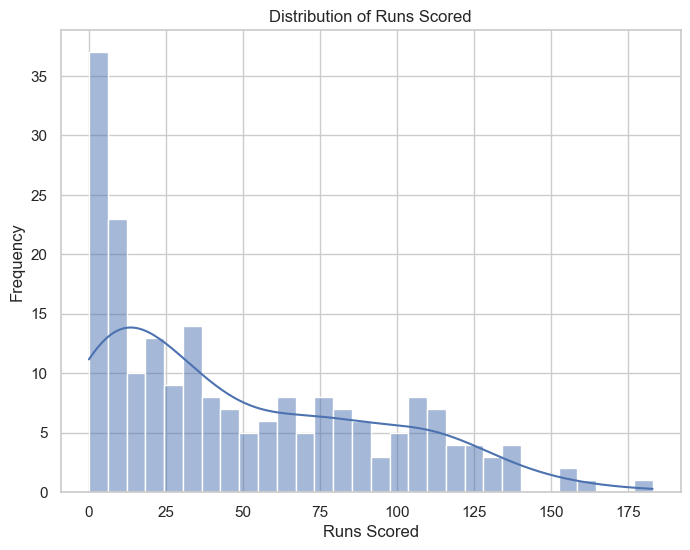

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df['RunsScored'], bins=30, kde=True)
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.show()

# Boxplot

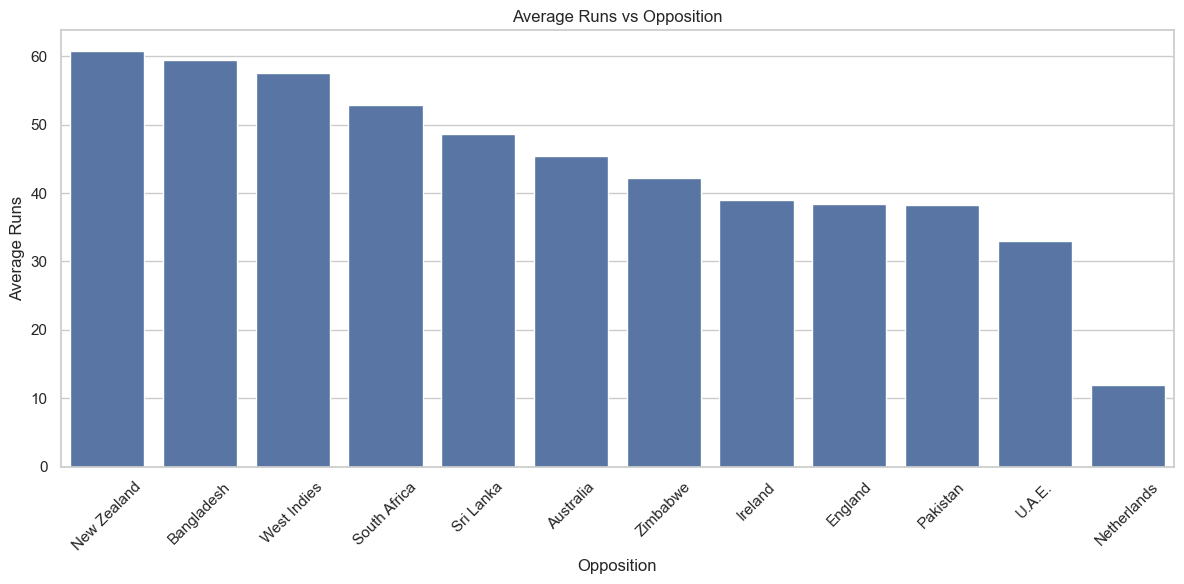

In [26]:
plt.figure(figsize=(12, 6))
avg_by_oppo = df.groupby('Opposition')['RunsScored'].mean().sort_values(ascending=False)
sns.barplot(x=avg_by_oppo.index, y=avg_by_oppo.values)
plt.title('Average Runs vs Opposition')
plt.xlabel('Opposition')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap

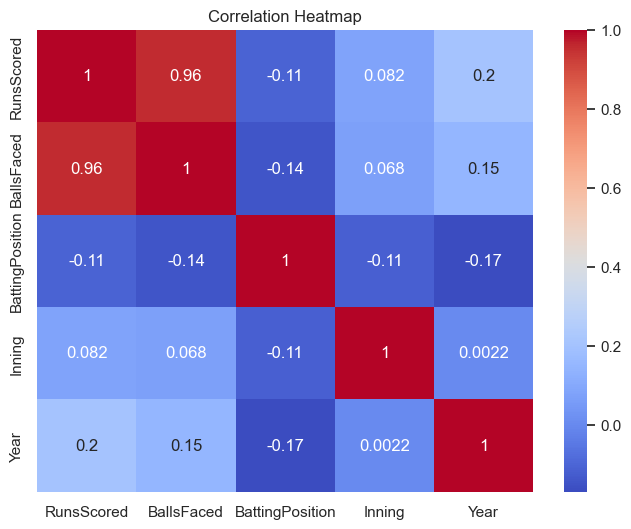

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()